In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file and create a DataFrame
df = pd.read_csv('acquisitions\processed_melinda_plant_2023-12-05_11-58.csv')

# Perform data exploration
print(df.head())

# convert the _time column to datetime for time series analysis
df['_time'] = pd.to_datetime(df['_time'])
# df = df.set_index('_time')
# convert packet_id to int
df['packet_id'] = df['packet_id'].astype(int)

print(df.info())

                              _time   accel_x   accel_y   accel_z    gyro_x  \
0  2023-12-05 11:58:07.867237+00:00 -0.002002  0.003320  0.003760 -0.378049   
1  2023-12-05 11:58:07.964926+00:00  0.000684  0.004297  0.004004 -0.012195   
2  2023-12-05 11:58:08.062517+00:00 -0.005420  0.010400 -0.001855 -0.012195   
3  2023-12-05 11:58:08.160128+00:00 -0.000049 -0.006445 -0.003320 -0.073171   
4  2023-12-05 11:58:08.257593+00:00  0.010205 -0.026221 -0.000635  0.048780   

     gyro_y    gyro_z  packet_id  quat_w  quat_x  quat_y  quat_z  time_diff  
0 -0.006098  0.054878        0.0     0.7    0.69    0.16    0.06   0.000000  
1 -0.006098 -0.067073        1.0     0.7    0.69    0.16    0.06   0.097689  
2 -0.006098  0.054878        2.0     0.7    0.69    0.16    0.06   0.097591  
3 -0.006098  0.054878        3.0     0.7    0.69    0.16    0.06   0.097611  
4 -0.067073 -0.006098        4.0     0.7    0.69    0.16    0.06   0.097465  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4135 en

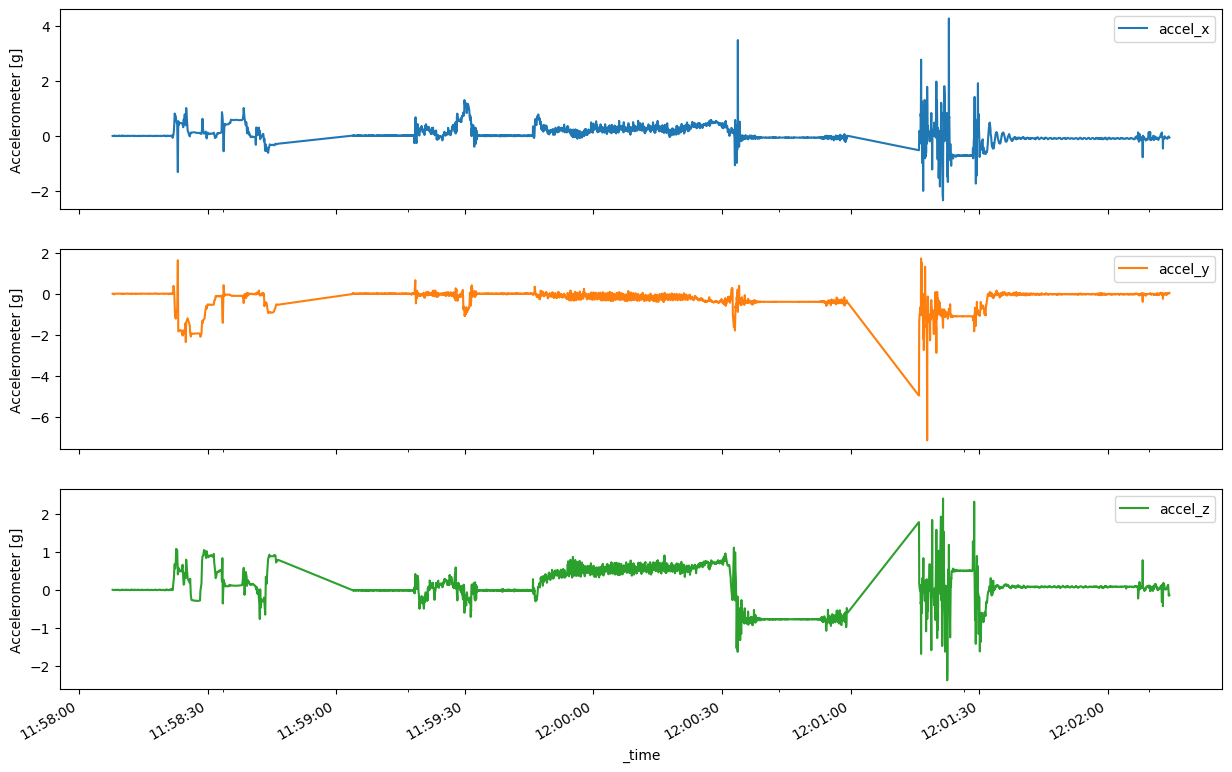

In [7]:
# plot the 'accel_x', 'accel_y', 'accel_z' columns over _time column
ax = df.plot(x='_time', y=['accel_x', 'accel_y', 'accel_z'], figsize=(15, 10), subplots=True)

# set x and y axis labels
ax[0].set_xlabel('Timestamp')
ax[0].set_ylabel('Accelerometer [g]')
ax[1].set_ylabel('Accelerometer [g]')
ax[2].set_ylabel('Accelerometer [g]')

plt.show()


Length of df_list: 2
                               _time   accel_x   accel_y   accel_z    gyro_x  \
321 2023-12-05 11:59:03.738702+00:00  0.008496 -0.012549 -0.005762  0.048780   
322 2023-12-05 11:59:03.787085+00:00  0.008496 -0.012549 -0.005762  0.048780   
323 2023-12-05 11:59:03.835086+00:00  0.005078  0.019922 -0.010400  0.170732   
324 2023-12-05 11:59:03.883289+00:00 -0.000049 -0.002539 -0.011133 -0.012195   
325 2023-12-05 11:59:03.885637+00:00  0.007520  0.012354 -0.015283 -0.012195   

       gyro_y    gyro_z  packet_id  quat_w  quat_x  quat_y  quat_z  time_diff  
321 -0.128049 -0.371951          0    0.62    0.58    0.41    0.33  17.308675  
322 -0.128049 -0.371951          1    0.62    0.58    0.41    0.33   0.048383  
323 -0.006098 -0.189024          2    0.62    0.58    0.41    0.33   0.048001  
324 -0.067073 -0.128049          3    0.62    0.58    0.41    0.33   0.048203  
325 -0.006098  0.542683          4    0.62    0.58    0.41    0.33   0.002348  


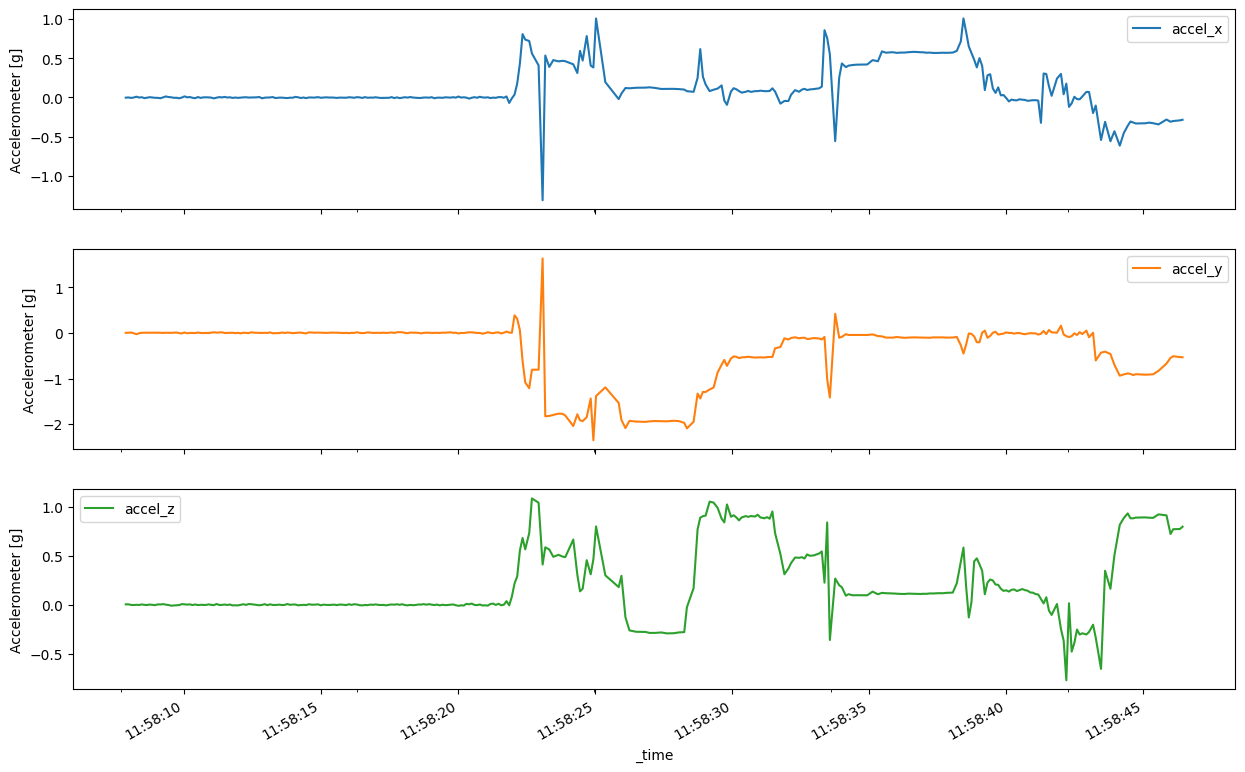

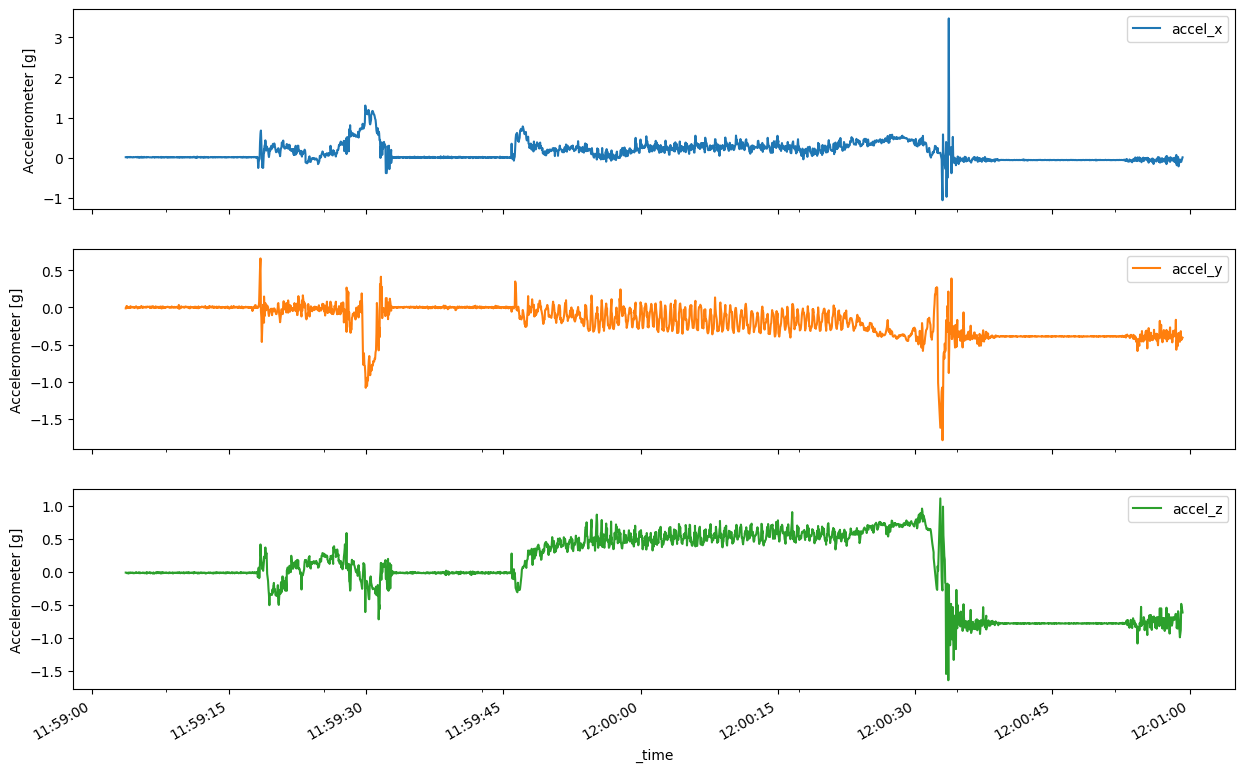

In [50]:
# Find the indices where time_diff is bigger than 0.3 seconds
split_indices = df[df['time_diff'] > 0.5].index

# Create a list of DataFrames split on the split_indices and sort them by packet_id
for i in range(len(split_indices+1)):
    if i == 0:
        df_list = [df.iloc[0:split_indices[i]].sort_values(by='packet_id')]
    elif i == len(split_indices):
        df_list.append(df.iloc[split_indices[i-1]:].sort_values(by='packet_id'))
    else:
        df_list.append(df.iloc[split_indices[i-1]:split_indices[i]].sort_values(by='packet_id'))

# Print the length of df_list
print("Length of df_list: {}".format(len(df_list)))

# Print the first 5 rows of the last DataFrame of df_list to check the data
print(df_list[-1].head())

# plot the 'accel_x', 'accel_y', 'accel_z' columns over _time column for each DataFrame in df_list
for i in range(len(df_list)):
    ax = df_list[i].plot(x='_time', y=['accel_x', 'accel_y', 'accel_z'], figsize=(15, 10), subplots=True)
    ax[0].set_xlabel('Timestamp')
    ax[0].set_ylabel('Accelerometer [g]')
    ax[1].set_ylabel('Accelerometer [g]')
    ax[2].set_ylabel('Accelerometer [g]')

    plt.show()

